<class 'list'>
512
9


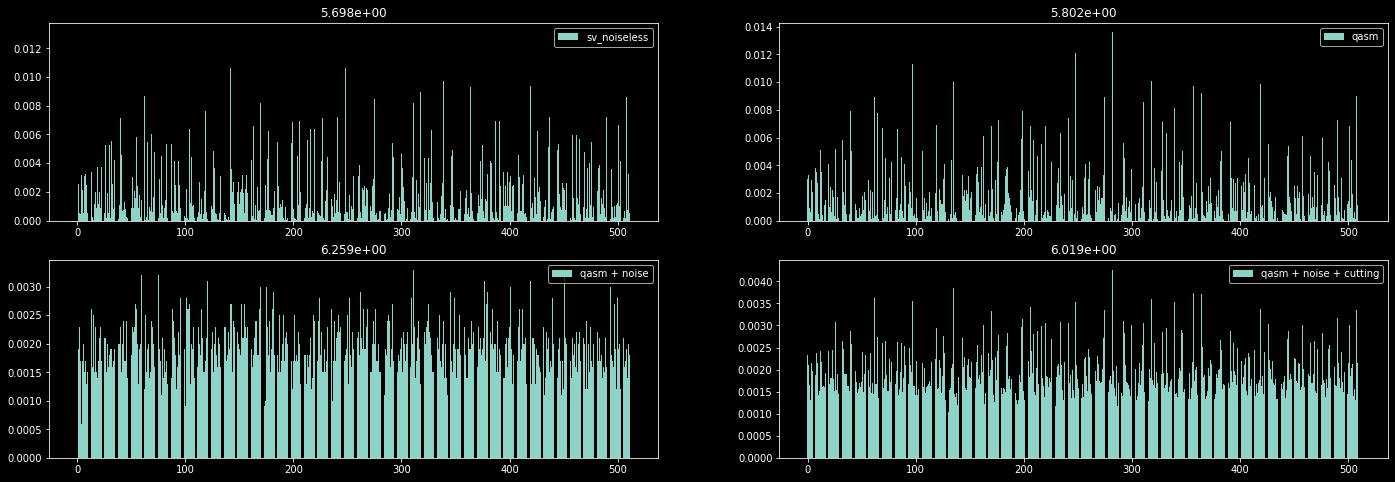

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def cross_entropy(target,obs):
    assert len(target)==len(obs)
    alpha = 1e-14
    if 0 in obs:
        obs = [(x+alpha)/(1+alpha*len(obs)) for x in obs]
    assert abs(sum(obs)-1)<1e-5
    h = 0
    for p,q in zip(target,obs):
        if p==0:
            h += 0
        else:
            assert q>=0
            h += -p*np.log(q)
    return h

filename = './noisy_benchmark_data/plotter_input_6_qubits_6_clusters_10000_shots.p'
f = open(filename, 'rb' )
benchmarks = []
while 1:
    try:
        benchmarks.append(pickle.load(f))
    except EOFError:
        break

trial_idx = 0
circuit_idx = 2
circ, evaluations, searcher_time, classical_time, quantum_time, uniter_time = benchmarks[trial_idx][circuit_idx]
print(type(evaluations['sv_noiseless']))
idx = 0
d1 = evaluations['sv_noiseless']
d2 = evaluations['qasm']
d3 = evaluations['qasm+noise']
d4 = evaluations['qasm+noise+cutting']
print(len(d1))
print(len(circ.qubits))
x = np.arange(len(d1))

plt.figure(figsize=(24,8))
plt.subplot(221)
plt.bar(x,height=d1,label='sv_noiseless')
plt.title('%.3e'%cross_entropy(d1,d1))
plt.legend()
plt.subplot(222)
plt.bar(x,height=d2,label='qasm')
plt.title('%.3e'%cross_entropy(d1,d2))
plt.legend()
plt.subplot(223)
plt.bar(x,height=d3,label='qasm + noise')
plt.title('%.3e'%cross_entropy(d1,d3))
plt.legend()
plt.subplot(224)
plt.bar(x,height=d4,label='qasm + noise + cutting')
plt.title('%.3e'%cross_entropy(d1,d4))
plt.legend()
plt.show()